In [41]:
# let's begin by installing the necessary libraries 

# %pip install pandas 
# %pip install seaborn 
# %pip install matplotlib
# %pip install numpy
# %pip install statsmodels
%pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [43]:
# let's proceed to import the installed libraries 

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# let's proceed to check the available datasets in the seaborn library 

get_sns_datasets = []
get_sns_datasets = sns.get_dataset_names()
to_pdDataframe = pd.DataFrame(get_sns_datasets)
to_pdDataframe

,0
0,anagrams
1,anscombe
2,attention
3,brain_networks
4,car_crashes
5,diamonds
6,dots
7,dowjones
8,exercise
9,flights


In [6]:
# we are going to be working with the diamond dataset, so lets proceed to loading it

diamond_dataset = sns.load_dataset('diamonds')

# let's check the first five rows of our dataset
diamond_dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# now that we have our dataset, let's proceed to cleaning our dataset

# firstly i want to check if there are any null values in our dataset

diamond_dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# seeing as there is no null values in our dataset, let's proceed to describe our dataset

# the describe method helps us to understand our dataset in terms of providing us with a statistical summary of our dataset

diamond_dataset.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:

# lets also use the info method to get an overview of our dataset
diamond_dataset.info()

In [16]:
# let's proceed to check if there are any duplicate values in our dataset

duplicated_values = diamond_dataset.duplicated()
true_ = diamond_dataset[duplicated_values]
print(true_)

       carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]


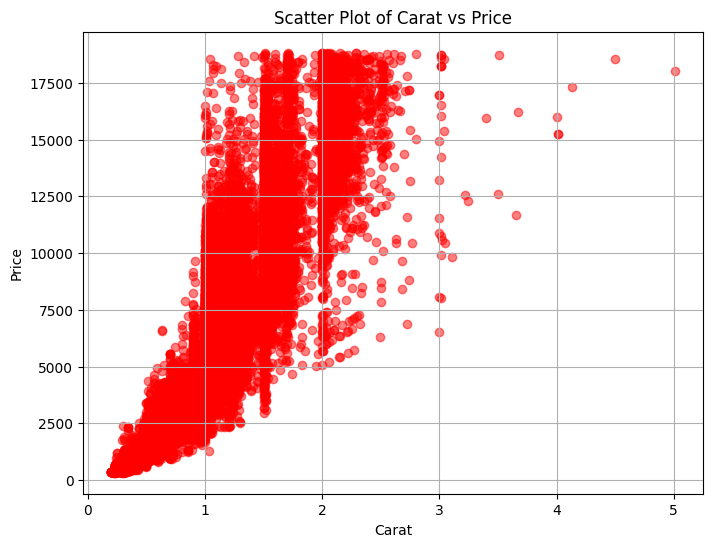

In [31]:
# lets check for duplicated values in our dataset
# lets drop the duplicated values
cleaned_diamond_dataset = diamond_dataset.drop_duplicates(keep='first')

X = cleaned_diamond_dataset[['cut','color','depth','table','price','x','y','z']]
y = cleaned_diamond_dataset['carat']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_diamond_dataset['carat'], cleaned_diamond_dataset['price'], color='red', cmap='hue', alpha=0.5)
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

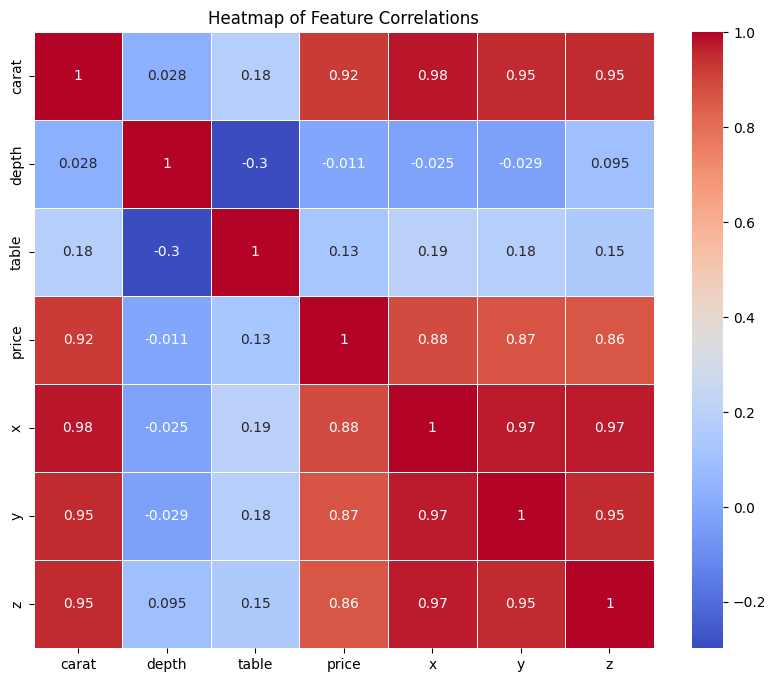

In [23]:
# Calculate the correlation matrix
# lets select numeric columns first

numeric_cols = cleaned_diamond_dataset[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
corr = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [34]:
# lets get the statistical summary of our numeric columns
mean_num_cols = numeric_cols.mean()
mean_num_cols

carat       0.797780
depth      61.748080
table      57.458109
price    3933.065082
x           5.731214
y           5.734653
z           3.538714
dtype: float64

In [39]:
# lets define our X and y

X = numeric_cols[['price']]
y = numeric_cols['carat']

# lets add our constant
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()  

# lets get the model summary 
model.summary()

# my observation
# lets # when i used the price feature alone as my X variable, i got an R-squared value of 0.849

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.030e+05
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        11:10:50   Log-Likelihood:                 14792.
No. Observations:               53794   AIC:                        -2.958e+04
Df Residuals:                   53792   BIC:                        -2.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3675      0.001    330.228      0.000       0.365       0.370
price          0.0001   1.99e-07    550.491      0.000       0.000       0.000
==============================================================================
Omnibus:                    10516.696   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139250.019
Skew:                           0.561   Prob(JB):                         0.00
Kurtosis:                      10.802   Cond. No.                     7.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# lets get the t-test and p-value

t_test,p_val = stats.ttest_ind(cleaned_diamond_dataset['carat'], cleaned_diamond_dataset['price'])
print(t_test)
print(p_val)

-228.68745111659996
0.0


In [49]:
if (p_val < 0.05):
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

We reject the null hypothesis
